# Additional sections (will 

## Using markdown instead of HTML

If you don't require exact control over HTML styling,
you can skip it altogether
and use the Markdown class from `dash_core_components` instead.

```python
import dash_core_components as dcc

dcc.Markdown('''
#### Dash and Markdown

Dash supports [Markdown](http://commonmark.org/help).

Markdown is a simple way to write and format text.
It includes a syntax for things like **bold text** and *italics*,
[links](http://commonmark.org/help), inline `code` snippets, lists,
quotes, and more.
''')
```

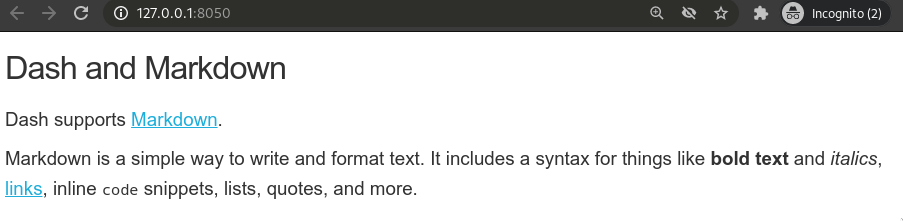

The Markdown class has a stylesheet built in,
so we don't need to be explicitly set it as above.
Our entire `app.py` now looks like this.

```python
import dash
import dash_core_components as dcc


app = dash.Dash(__name__)

app.layout = dcc.Markdown('''
#### Dash and Markdown

Dash supports [Markdown](http://commonmark.org/help).

Markdown is a simple way to write and format text.
It includes a syntax for things like **bold text** and *italics*,
[links](http://commonmark.org/help), inline `code` snippets, lists,
quotes, and more.
''')

if __name__ == '__main__':
    app.run_server(debug=True)
```

## Tabs

Tabs can be used to switch between completely different sections
that you might not want to display at the same time in your dashboard.
A tab could also be a good place to have help instructions for how to use the dashboard etc.

```python
app.layout = html.Div([
    dcc.Tabs([
        dcc.Tab('Some text', label='Tab one'),
        dcc.Tab('Some other text', label='Tab two')])])
```

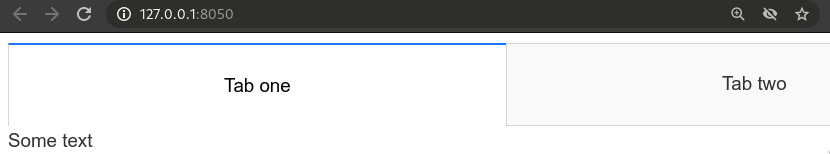

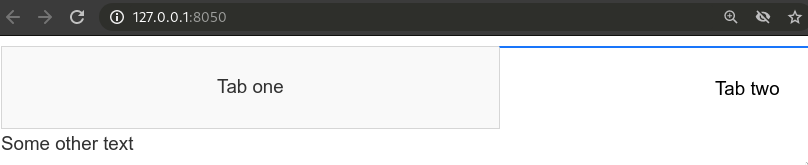

You could use HTML and Markdown properties inside tabs,
just as we used them in the layout:

```python
app.layout = html.Div([
    dcc.Tabs([
        dcc.Tab([
            html.H1('A heading'),
            html.P('With a help paragraph')],
            label='Tab one'),
        dcc.Tab('Some other text', label='Tab two')])])
```

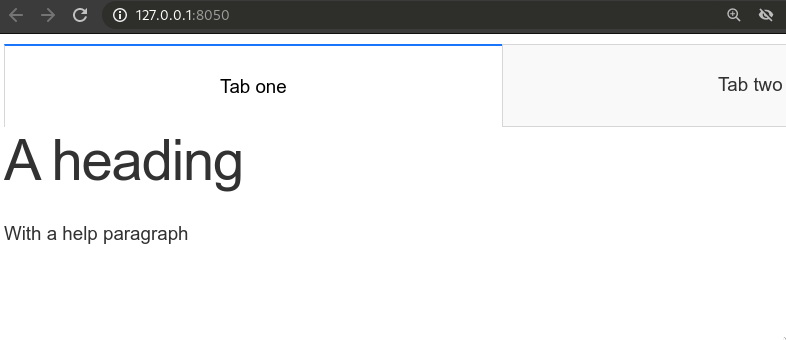

You can add multiple inputs or outputs.
For example,
one text input can update multiple html divs,
by adding an additional `Outpu()` in the decorator
and returning an additional value in the function.

```python
app.layout = html.Div([
    dcc.Input(id='widget-1'),
    html.Div(id='widget-2'),
    html.Div(id='widget-3')])

@app.callback(
    Output('widget-2', 'children'),
    Output('widget-3', 'children'),
    Input('widget-1', 'value'))
def update_output(input_value):
    return input_value, input_value
```

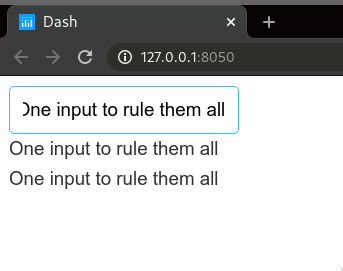

You can also change the function to return two different values
instead of the same to both the inputs.

```python
app.layout = html.Div([
    dcc.Input(id='widget-1', value=''),
    dcc.Input(id='widget-4', value=''),
    html.Div(id='widget-2'),
    html.Div(id='widget-3')])

@app.callback(
    Output('widget-2', 'children'),
    Output('widget-3', 'children'),
    Input('widget-1', 'value'),
    Input('widget-4', 'value'))
def update_output(input_value1, input_value2):
    return input_value1, input_value1 + input_value2
```

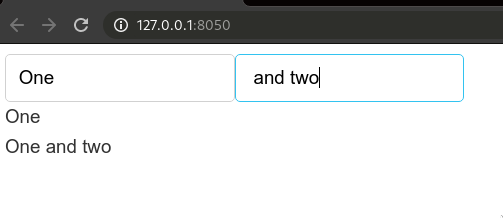

Note that we set the default value of the two input widgets to `''`.
If we don't do this the default value is `None`
and when we initialize the app it will throw and error
because you can't do `None + None`.

For more advanced call backs such as chaining
and apps with a "state" where you control *when* the values are read
(e.g. press of a button),
see [the callback section of the docs](https://dash.plotly.com/basic-callbacks).